In [344]:
%matplotlib notebook

In [345]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import importlib
import pyodine.controller.feature_locator
pyodine.controller.feature_locator = importlib.reload(pyodine.controller.feature_locator)
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [346]:
loc = pyodine.controller.feature_locator.FeatureLocator()
loc.load_reference('../data/Matlab Spectrum (KD code).txt')

<IPython.core.display.Javascript object>


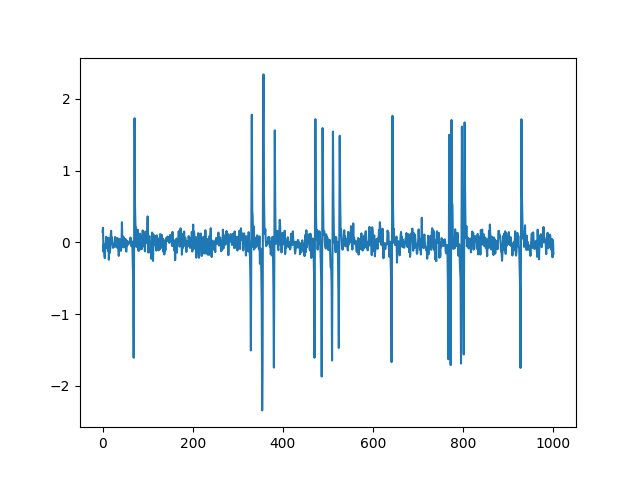

In [347]:
loc.sample = loc.reference[790:830]

# Add noise.
loc.reference = np.add(loc.reference, np.random.normal(0, .1, len(loc.reference)))
loc.sample = np.add(loc.sample, np.random.normal(0, .1, len(loc.sample)))

plt.plot(loc.reference)
plt.show()

<IPython.core.display.Javascript object>


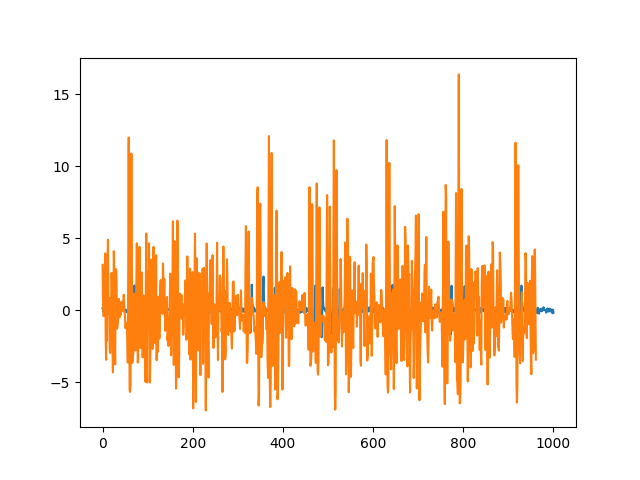

<IPython.core.display.Javascript object>


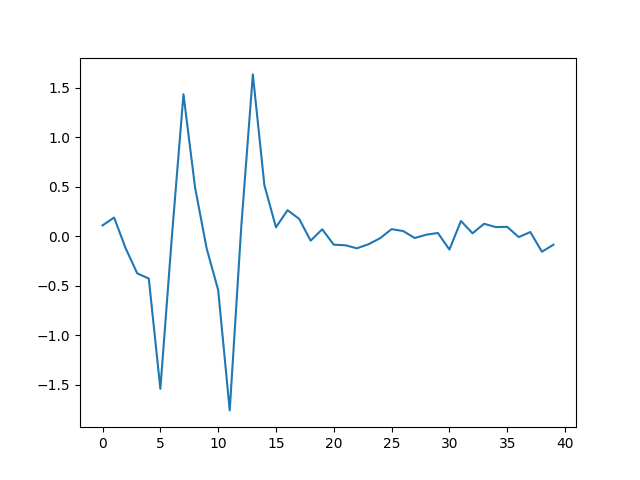

(790, 0.26126830488866459)

In [348]:
plt.figure()
plt.plot(loc.reference)
plt.plot(loc.correlate())
plt.figure()
plt.plot(loc.sample)
plt.show()
position, confidence = loc.locate_sample()
(position, confidence)

<IPython.core.display.Javascript object>


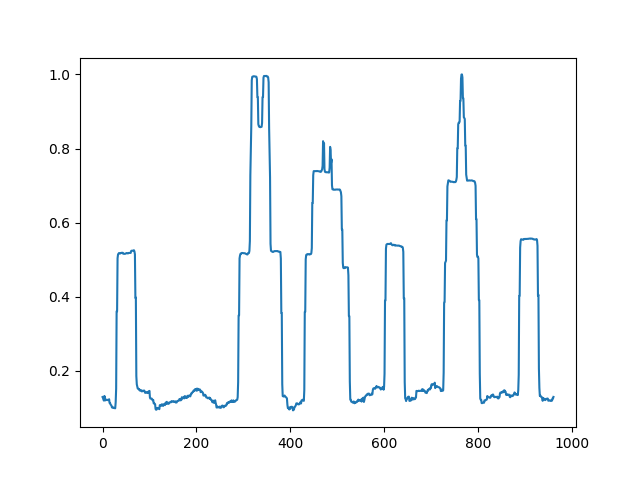

(962, 962)

In [349]:
plt.figure()
plt.plot(loc._get_normalization())
plt.show()
(len(loc._get_normalization()), len(loc.correlate()))